# Hunt for Red October: INSS 2018 Project
### Brendon Bullard, Alex Diaz, Joe Johnston

The goal of this project is to determine the feasibiliy of detecting the presence of a nuclear submarine through the detection of neutrinos produced by its reactor. We will assume the nuclear submarine operates at a maximum of 150 MW at full speed of 45 knots and reactor power is proportional to speed. Acheives maximal depth of 300 m. We will also assume that the $\bar{\nu}_e$ flux from the reactor only comes from fission of $^{235}U$. Then we can compute the expected flux for a water cherenkov detector at a distance of 500 m as a function of neutrino energy:

In [1]:
from fake_data import FakeDataGenerator
from parameter_estimation import AnalyzeAntiNueCounts
import numpy as np

Total expected counts: 1.53e+03
Measured counts: 1590


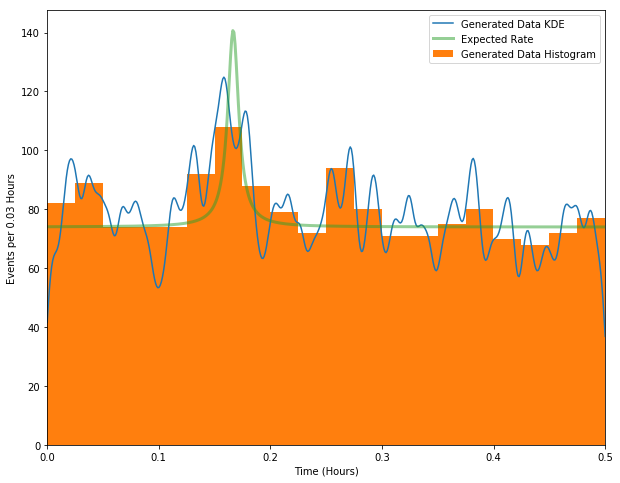

In [3]:
tMax = 1/2
t0 = tMax/3
#d0 = 1160.
d0 = 500
numDet = 10000.
#.064 events/day
background = 7.1/24*numDet
signal = 66.01/24*numDet
gen = FakeDataGenerator(background, signal, 1050., 6800., t0, d0, 83340., 150.)
times = gen.generate(0, tMax)

In [4]:
analyzer = AnalyzeAntiNueCounts(times, background, signal, tMax)

In [5]:
prior_type = ['uniform', 'uniform']
prior_param1 = [0., 0.]
prior_param2 = [tMax, np.sqrt(350.**2+14300.**2)]
analyzer.set_priors(prior_type, prior_param1, prior_param2)

In [8]:
samples = analyzer.run_MCMC([tMax/2, 1000], 100, 300)

Progress: 
[###################                                                                                 ]

/home/brendon/Documents/jupyter_notebooks/inss2018_red_october/parameter_estimation.py:165: RuntimeWarning: divide by zero encountered in log
  logL = np.log(poisson.pmf(len(self.t), NexpTot))


[####################################                                                                ]

/home/brendon/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


[####################################################################################################]

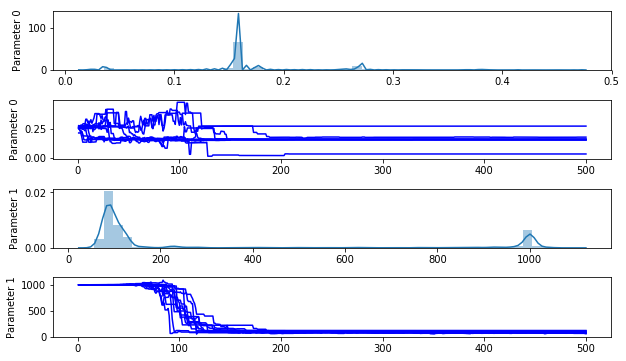

Param 0 = 0.158194 + 0.093205 - 0.000829
Param 1 = 101.017463 + 869.874953 - 18.438621


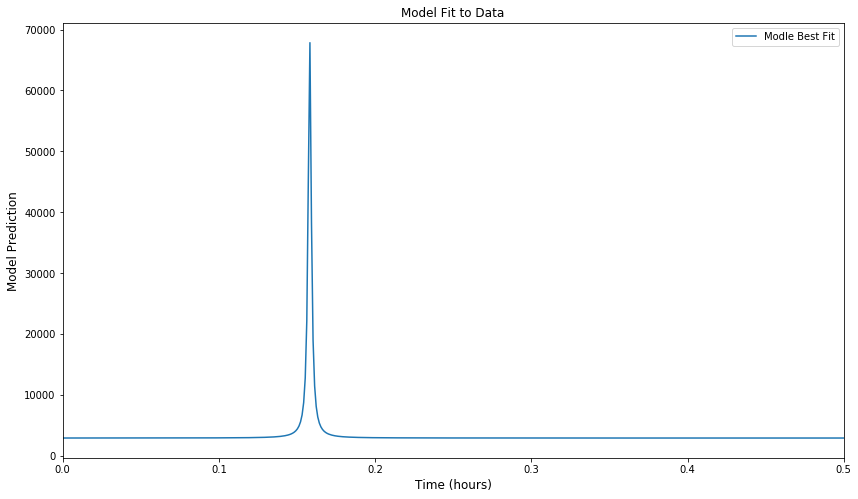

In [7]:
analyzer.show_results(burnin=0)